In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lets load the dataset
bank_df=pd.read_csv('/content/Churn_Modelling.csv')
bank_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# we don't need rownumber,customerid and surname as they dont contribute for analysis and prediction
# so lets drop them
bank_df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)
bank_df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_df.shape

(10000, 11)

In [5]:
# lets check for null values
bank_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
bank_df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
# now we just need to focus on these object dtypes
# lets find out the unique values in them
# lets define a function to show unique of object dtype
def obj_unique(df):
  for col in df:
    if df[col].dtype=='object':
      print(df[col].value_counts())
      print('-'*70)

In [8]:
obj_unique(bank_df)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
----------------------------------------------------------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
----------------------------------------------------------------------


In [9]:
# lets perform onehot encoding on Geography column
bank_df=pd.get_dummies(data=bank_df,columns=['Geography'])
bank_df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [10]:
bank_df.shape

(10000, 13)

In [ ]:
# lets replace values of Gender column to 1's and 0's
bank_df['Gender'].replace({'Male':1,'Female':0},inplace=True)


In [36]:
bank_df.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1
5,645,1,44,8,113755.78,2,1,0,149756.71,1,0,0,1
6,822,1,50,7,0.00,2,1,1,10062.80,0,1,0,0
7,376,0,29,4,115046.74,4,1,0,119346.88,1,0,1,0
8,501,1,44,4,142051.07,2,0,1,74940.50,0,1,0,0
9,684,1,27,2,134603.88,1,1,1,71725.73,0,1,0,0


In [12]:
bank_df.shape

(10000, 13)

In [13]:
bank_df.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [14]:
# lets see the class distribution in target variable
bank_df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [15]:
# lets perform train test split
from sklearn.model_selection import train_test_split
X=bank_df.drop(['Exited'],axis=1)
y=bank_df['Exited']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

In [16]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


In [17]:
# lets apply standardization
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train)
X_test=sc.transform(X_test)

In [18]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


In [19]:
# lets import tensorflow, keras
import tensorflow as tf
from tensorflow import keras

In [20]:
model=keras.Sequential([
                        keras.layers.Dense(12,input_shape=(12,),activation='relu'),
                        keras.layers.Dense(11,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid')
])


In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [22]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
# early stopping
es=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=200)
mc=ModelCheckpoint('best_model.h5',monitor='val_accuracy',mode='max',verbose=1,save_best_only=True)
#fit model
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=4000,verbose=0,callbacks=[es,mc])
#load the saved model
saved_model=load_model('best_model.h5')
#evaluate the model
_,train_acc=saved_model.evaluate(X_train,y_train,verbose=0)
_,test_acc=saved_model.evaluate(X_test,y_test,verbose=0)
print('Train: {}, Test: {}'.format(train_acc,test_acc))


Epoch 00001: val_accuracy improved from -inf to 0.80000, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.80000 to 0.80150, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.80150 to 0.81800, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.81800 to 0.83500, saving model to best_model.h5

Epoch 00005: val_accuracy improved from 0.83500 to 0.84250, saving model to best_model.h5

Epoch 00006: val_accuracy improved from 0.84250 to 0.84750, saving model to best_model.h5

Epoch 00007: val_accuracy improved from 0.84750 to 0.85000, saving model to best_model.h5

Epoch 00008: val_accuracy improved from 0.85000 to 0.85550, saving model to best_model.h5

Epoch 00009: val_accuracy improved from 0.85550 to 0.85800, saving model to best_model.h5

Epoch 00010: val_accuracy did not improve from 0.85800

Epoch 00011: val_accuracy did not improve from 0.85800

Epoch 00012: val_accuracy improved from 0.85800 to 0.86000, saving mode

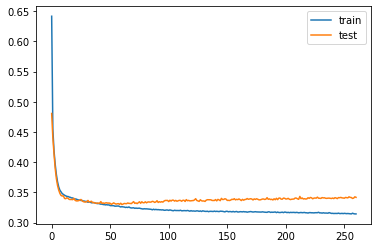

In [23]:
#lets plot the train and test loss
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [24]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3418 - accuracy: 0.8620


[0.3417831361293793, 0.8619999885559082]

In [25]:
import joblib
joblib.dump(sc,'scaler.pkl')

['scaler.pkl']

In [26]:
# loading the scaler
sc=joblib.load('scaler.pkl')

In [27]:
# loading the model
ann_model=load_model('best_model.h5')

In [28]:
# lets take y predictions
yp=ann_model.predict(X_test)
yp[:5]

array([[0.01866133],
       [0.02013155],
       [0.01435114],
       [0.00428309],
       [0.00657497]], dtype=float32)

In [38]:
yp[:10]

array([[0.01866133],
       [0.02013155],
       [0.01435114],
       [0.00428309],
       [0.00657497],
       [0.8240108 ],
       [0.6419537 ],
       [0.01034631],
       [0.2797211 ],
       [0.01840815]], dtype=float32)

In [29]:
# lets store these y predictions in 1's and 0's format
y_pred=[]
for i in yp:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [30]:
y_pred[:10]

[0, 0, 0, 0, 0, 1, 1, 0, 0, 0]

In [31]:
# lets print classification metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1600
           1       0.82      0.44      0.57       400

    accuracy                           0.87      2000
   macro avg       0.85      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000



In [32]:
# confusion matrix
print(confusion_matrix(y_test,y_pred))

[[1562   38]
 [ 225  175]]


In [33]:
tp,fn,fp,tn=confusion_matrix(y_test,y_pred).reshape(-1)
print('tp:{}, fn:{}, fp:{}, tn:{}'.format(tp,fn,fp,tn))

tp:1562, fn:38, fp:225, tn:175


In [34]:
# lets test the predictions
# index 0. expected 1 but got 0
prediction=ann_model.predict(sc.transform([[619,0,42,2,0.00,1,1,1,101348.88,1,0,0]])) > 0.5
prediction

array([[False]])

In [37]:
# index 5
# expected 1 and got 1
prediction=ann_model.predict(sc.transform([[645,1,44,8,113755.78,2,1,0,149756.71,0,0,1]])) > 0.5
prediction

array([[False]])

In [41]:
# index 7. expected 1 and got 1
ann_model.predict(sc.transform([[376,0,29,4,115046.74,4,1,0,119346.88,0,1,0]])) > 0.5

array([[ True]])